In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
input_data = pd.read_csv('data/dataA/merge_rawdata(no_ageStructure).csv')
# print(input_data.head())
print(input_data.columns)
# '城市名称', '年份', '人均消费支出', '人均可支配收入', '从业人员数', '第一产业从业人员数', '第二产业从业人员数',
# '第三产业从业人员数', '常住人口（万人）', '户籍人口（万人）', '人口密度（人/平方公里）', '农村居民消费支出',
# '农村居民人均收入', '城镇居民消费支出', '城镇居民人均收入', '城镇失业率', '城镇化率', '工资水平'
groups = input_data.groupby('城市名称',sort=False)
print(f"城市数量:{len(groups)}")


Index(['城市名称', '年份', '从业人员数', '第一产业从业人员数', '第二产业从业人员数', '第三产业从业人员数',
       '农村居民消费支出', '农村居民人均收入', '城镇居民消费支出', '城镇居民人均收入', '人均消费支出', '人均可支配收入',
       '城镇失业率', '城镇化率', '工资水平', '人口密度（人/平方公里）', '常住人口（万人）', '户籍人口（万人）'],
      dtype='object')
城市数量:40


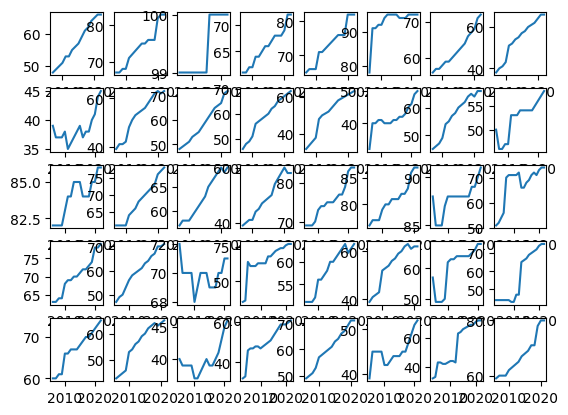

In [72]:
# 绘制城市的城镇化率变化曲线
for i,(name,group) in enumerate(groups):
  plt.subplot(5,8,i+1)
  group = group.sort_values(by='年份')
  # 绘制城镇化率变化曲线
  plt.plot(group['年份'],group['城镇化率'],label=name)
plt.show()

In [73]:
# clean 城镇化率

# 平滑city3的城镇化率
city3 = groups.get_group('city3')
city3 = city3.sort_values(by='年份')
# print(city3[['年份','城镇化率']])
city3['城镇化率'] = city3['城镇化率'].mean(skipna=True)
# print(city3[['年份','城镇化率']])

# city3数据重新整合到input_data中
input_data = input_data[input_data['城市名称']!='city3']
input_data = pd.concat([input_data,city3],axis=0)
# print(input_data[input_data['城市名称']=='city3'])


# 计算每个城市的城镇化率均值
groups = input_data.groupby('城市名称',sort=False)
city_urbanization_rate = pd.DataFrame()
city_urbanization_rate['城市名称'] = groups['城市名称'].first().values
city_urbanization_rate['城镇化率多年均值'] = groups['城镇化率'].mean().values
city_urbanization_rate.to_csv('data/clean/city_urbanization_rate.csv',index=False)

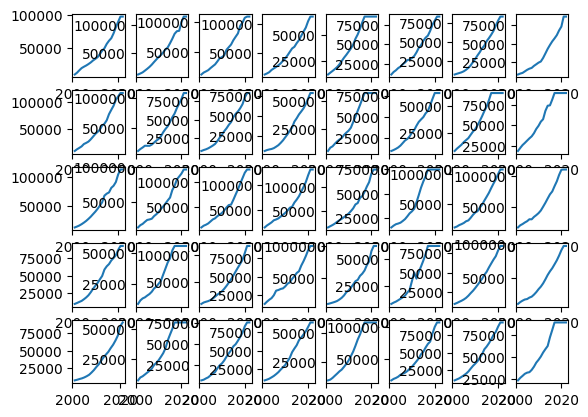

In [74]:
# 使用插值方式填充城市的工资水平缺失值
for name,group in groups:
  group = group.sort_values(by='年份')
  group['工资水平'] = group['工资水平'].interpolate(method='linear',limit_direction='forward')
  input_data.loc[input_data['城市名称']==name,'工资水平'] = group['工资水平'].values

# 绘制城市的工资变化变化曲线
for i,(name,group) in enumerate(groups):
  plt.subplot(5,8,i+1)
  group = group.sort_values(by='年份')
  # 绘制城镇化率变化曲线
  plt.plot(group['年份'],group['工资水平'],label=name)
plt.show()

input_data.to_csv('data/clean/merge_rawdata.csv',index=False)

In [76]:
# 计算每个城市的工资水平均值
groups = input_data.groupby('城市名称',sort=False)
city_salary = pd.DataFrame()
city_salary['城市名称'] = groups['城市名称'].first().values
city_salary['工资水平多年均值'] = groups['工资水平'].mean().values
print(city_salary[['城市名称','工资水平多年均值']])
city_salary.to_csv('data/clean/city_salary.csv',index=False)

      城市名称      工资水平多年均值
0    city1  46409.000000
1    city2  55293.818182
2    city4  54762.000000
3    city5  54260.727273
4    city6  41610.454545
5    city7  44024.545455
6    city8  38922.727273
7    city9  37461.454545
8   city10  55343.909091
9   city11  49362.000000
10  city12  40171.818182
11  city13  35369.454545
12  city14  32870.727273
13  city15  40035.000000
14  city16  36460.909091
15  city17  58118.181818
16  city18  53635.000000
17  city19  48315.454545
18  city20  56691.363636
19  city21  60908.545455
20  city22  62666.000000
21  city23  44725.818182
22  city24  49835.454545
23  city25  56377.090909
24  city26  46072.727273
25  city27  33876.363636
26  city28  50313.272727
27  city29  47058.909091
28  city30  42380.000000
29  city31  34344.782609
30  city32  40663.272727
31  city33  47165.272727
32  city34  36494.476190
33  city35  32294.909091
34  city36  36022.727273
35  city37  43330.909091
36  city38  35122.727273
37  city39  51287.818182
38  city40  45664.000000


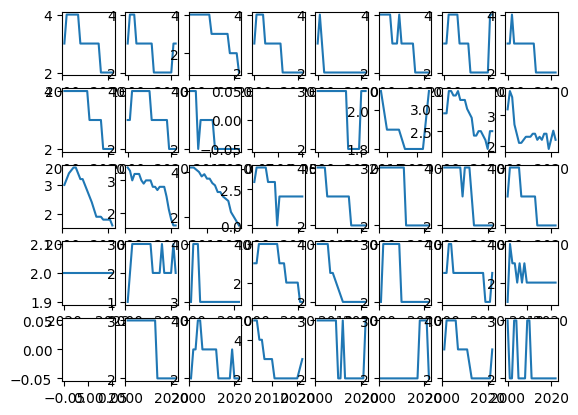

In [81]:
groups = input_data.groupby('城市名称',sort=False)
# 使用插值方式填充城市的失业率缺失值
for name,group in groups:
  group = group.sort_values(by='年份')
  group['城镇失业率'] = group['城镇失业率'].interpolate(method='linear',limit_direction='forward')
  input_data.loc[input_data['城市名称']==name,'城镇失业率'] = group['城镇失业率'].values

# 绘制城市的城镇失业率变化曲线
for i,(name,group) in enumerate(groups):
  plt.subplot(5,8,i+1)
  group = group.sort_values(by='年份')
  # 绘制城镇化率变化曲线
  plt.plot(group['年份'],group['城镇失业率'],label=name)
plt.show()

input_data.to_csv('data/clean/merge_rawdata.csv',index=False)


In [82]:
# 计算每个城市的城镇失业率均值
groups = input_data.groupby('城市名称',sort=False)
city_unemployment_rate = pd.DataFrame()
city_unemployment_rate['城市名称'] = groups['城市名称'].first().values
city_unemployment_rate['城镇失业率多年均值'] = groups['城镇失业率'].mean().values
print(city_unemployment_rate[['城市名称','城镇失业率多年均值']])
city_unemployment_rate.to_csv('data/clean/city_unemployment_rate.csv',index=False)

      城市名称  城镇失业率多年均值
0    city1   3.000000
1    city2   2.739130
2    city4   3.136364
3    city5   2.739130
4    city6   2.173913
5    city7   2.954545
6    city8   2.913043
7    city9   2.608696
8   city10   3.272727
9   city11   3.217391
10  city12   2.571429
11  city13        NaN
12  city14   2.739130
13  city15   1.900000
14  city16   2.840909
15  city17   2.459091
16  city18   2.615909
17  city19   2.750000
18  city20   3.194737
19  city21   2.590909
20  city22   2.857143
21  city23   2.500000
22  city24   3.090909
23  city25   2.818182
24  city26   2.000000
25  city27   2.454545
26  city28   3.136364
27  city29   2.954545
28  city30   2.675000
29  city31   2.391304
30  city32   2.954545
31  city33   2.238095
32  city34        NaN
33  city35   2.590909
34  city36   2.636364
35  city37   2.775000
36  city38   2.500000
37  city39   2.181818
38  city40   2.795455
39   city3   2.217391
